Library imports

In [1]:
from __future__ import print_function, division

import atomman as am
import atomman.unitconvert as uc

from DataModelDict import DataModelDict as DM

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import iprPy

Plot settings

In [2]:
import seaborn as sns

Parameter Settings

In [3]:
lib_directory = 'C:/Users/lmh1/Documents/calculations/ipr/library_2016_10_26'

potential = '1987--Ackland-G-J--Ag'
calc_type = ['refine_structure_static','LAMMPS_ELASTIC','dynamic_relax']

In [4]:
data_dicts = []
for record in iprPy.prepare.read_records(lib_directory, potential=potential, calc_type=calc_type):

    data_dict = {}
    data_dict['calc_key'] =  record['model'].find('calculation')['id']
    data_dict['calc_type'] = record['model'].find('calculation')['script']
    data_dict['pot_id'] =    record['model'].find('potential')['id']
    data_dict['prototype'] = record['model'].find('system-info')['artifact']['family']
    data_dict['symbols'] =   record['model'].find('system-info')['symbols']
    try: data_dict['strain-range'] = record['model'].find('run-parameter')['strain-range']
    except: pass    
    
    #Get results for static methods
    try:
        sys = record['model'].find('relaxed-atomic-system')
    except:
        pass
    else:
        data_dict['a'] = sys.find('a')['value']
        try:    data_dict['b'] = sys.find('b')['value']
        except: data_dict['b'] = data_dict['a']
        try:    data_dict['c'] = sys.find('c')['value']
        except: data_dict['c'] = data_dict['a']
        data_dict['Ecoh'] = record['model'].find('cohesive-energy')['value']
        
    #Get results for dynamic method
    try:
        equil = record['model'].find('equilibrium-averages')
    except:
        pass
    else:
        data_dict['a'] =     equil['a']['value']
        data_dict['a_err'] = equil['a']['error']
        data_dict['b'] =     equil['b']['value']
        data_dict['b_err'] = equil['b']['error']
        data_dict['c'] =     equil['c']['value']
        data_dict['c_err'] = equil['c']['error']
        data_dict['Ecoh'] =     equil['cohesive-energy']['value']
        data_dict['Ecoh_err'] = equil['cohesive-energy']['error']
    
    data_dicts.append(data_dict)
    
data = pd.DataFrame(data_dicts)
data

,Ecoh,Ecoh_err,a,a_err,b,b_err,c,c_err,calc_key,calc_type,pot_id,prototype,strain-range,symbols
0,-2.928810,0.000007,6.635727,0.005148,6.635727,0.005148,6.635727,0.005148,545d6ce0-ff64-4ab1-a969-7e2991492bfd,calc_dynamic_relax,1987--Ackland-G-J--Ag,L2_1--AlCu2Mn--heusler,NaN,"[Ag, Ag, Ag]"
1,-2.928811,NaN,6.635728,NaN,6.635728,NaN,6.635728,NaN,54c2eb8c-e0da-4cbd-b1ff-7a2be06d7b73,calc_LAMMPS_ELASTIC,1987--Ackland-G-J--Ag,L2_1--AlCu2Mn--heusler,1.000000e-04,"[Ag, Ag, Ag]"
2,-2.928811,NaN,6.635728,NaN,6.635728,NaN,6.635728,NaN,8b05f4ea-432a-4970-af4d-bc30bea8fd50,calc_LAMMPS_ELASTIC,1987--Ackland-G-J--Ag,L2_1--AlCu2Mn--heusler,1.000000e-05,"[Ag, Ag, Ag]"
3,-2.928811,NaN,6.635728,NaN,6.635728,NaN,6.635728,NaN,e22277bf-b3c4-42bd-8bce-343b160ad57a,calc_LAMMPS_ELASTIC,1987--Ackland-G-J--Ag,L2_1--AlCu2Mn--heusler,1.000000e-06,"[Ag, Ag, Ag]"
4,-2.928811,NaN,6.635728,NaN,6.635728,NaN,6.635728,NaN,ee320c1d-b9ad-45d4-b365-f64be8c062ba,calc_LAMMPS_ELASTIC,1987--Ackland-G-J--Ag,L2_1--AlCu2Mn--heusler,1.000000e-07,"[Ag, Ag, Ag]"
5,-2.928811,NaN,6.635728,NaN,6.635728,NaN,6.635728,NaN,ee8ea71b-2aea-4ee2-a9a9-1bd8d3e9230b,calc_LAMMPS_ELASTIC,1987--Ackland-G-J--Ag,L2_1--AlCu2Mn--heusler,1.000000e-08,"[Ag, Ag, Ag]"
6,-2.928811,NaN,6.635728,NaN,6.635728,NaN,6.635728,NaN,1406cc32-13cb-48d1-847c-ccb15d19135b,calc_refine_structure_static,1987--Ackland-G-J--Ag,L2_1--AlCu2Mn--heusler,1.000000e-04,"[Ag, Ag, Ag]"
7,-2.928811,NaN,6.635728,NaN,6.635728,NaN,6.635728,NaN,199076e5-8376-4322-b2d2-a31814b2f5d5,calc_refine_structure_static,1987--Ackland-G-J--Ag,L2_1--AlCu2Mn--heusler,1.000000e-05,"[Ag, Ag, Ag]"
8,-2.928811,NaN,6.635728,NaN,6.635728,NaN,6.635728,NaN,7889f92d-7462-4c8f-b2b3-5b0db1091797,calc_refine_structure_static,1987--Ackland-G-J--Ag,L2_1--AlCu2Mn--heusler,1.000000e-08,"[Ag, Ag, Ag]"
9,-2.928811,NaN,6.635728,NaN,6.635728,NaN,6.635728,NaN,c9b1bd90-d5ff-47d9-85a1-f37389f47e20,calc_refine_structure_static,1987--Ackland-G-J--Ag,L2_1--AlCu2Mn--heusler,1.000000e-07,"[Ag, Ag, Ag]"


In [7]:
for prototype in data.prototype.unique():
    print(prototype)
    d = data[data.prototype==prototype]
    for index, row in d.iterrows():
        print('%.6f %.6f %.6f %s' % (row.a, row.b, row.c, row.calc_type)) 
    

L2_1--AlCu2Mn--heusler
6.635727 6.635727 6.635727 calc_dynamic_relax
6.635728 6.635728 6.635728 calc_LAMMPS_ELASTIC
6.635728 6.635728 6.635728 calc_LAMMPS_ELASTIC
6.635728 6.635728 6.635728 calc_LAMMPS_ELASTIC
6.635728 6.635728 6.635728 calc_LAMMPS_ELASTIC
6.635728 6.635728 6.635728 calc_LAMMPS_ELASTIC
6.635728 6.635728 6.635728 calc_refine_structure_static
6.635728 6.635728 6.635728 calc_refine_structure_static
6.635728 6.635728 6.635728 calc_refine_structure_static
6.635728 6.635728 6.635728 calc_refine_structure_static
6.635728 6.635728 6.635728 calc_refine_structure_static
A15--Cr3Si
5.277082 5.277082 5.277082 calc_dynamic_relax
5.277081 5.277081 5.277081 calc_LAMMPS_ELASTIC
5.277081 5.277081 5.277081 calc_LAMMPS_ELASTIC
5.277081 5.277081 5.277081 calc_LAMMPS_ELASTIC
5.277081 5.277081 5.277081 calc_LAMMPS_ELASTIC
5.277081 5.277081 5.277081 calc_LAMMPS_ELASTIC
5.277081 5.277081 5.277081 calc_refine_structure_static
5.277081 5.277081 5.277081 calc_refine_structure_static
5.277081 5.2

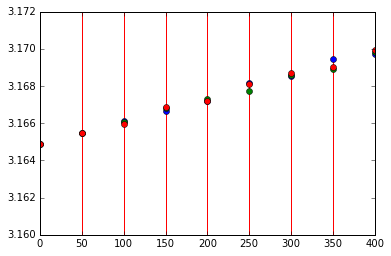

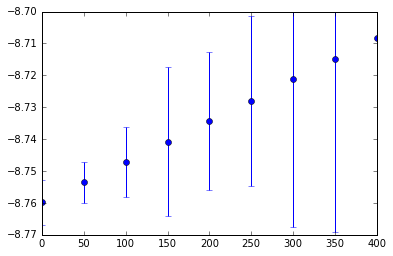

In [4]:
d = data[data.ma==3]
plt.errorbar(d['temperature (K)'], d['a (A)'], fmt='o', yerr=list(d['a err (A)']))
plt.errorbar(d['temperature (K)'], d['b (A)'], fmt='o', yerr=list(d['b err (A)']))
plt.errorbar(d['temperature (K)'], d['c (A)'], fmt='o', yerr=list(d['c err (A)']))
plt.ylim(3.16, 3.172)
plt.show()
plt.errorbar(d['temperature (K)'], d['Ecoh (eV)'], fmt='o', yerr=list(d['Ecoh err (eV)']))
plt.ylim(-8.77, -8.70)
plt.show()

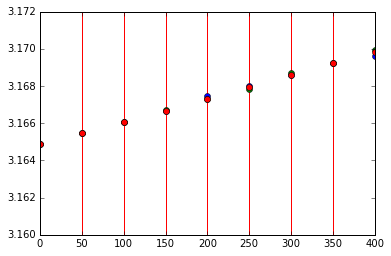

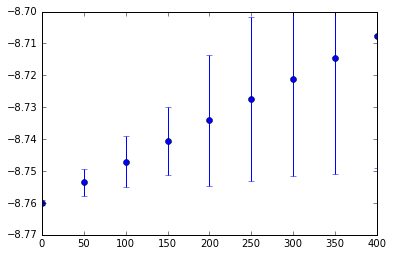

In [5]:
d = data[data.ma==4]
plt.errorbar(d['temperature (K)'], d['a (A)'], fmt='o', yerr=list(d['a err (A)']))
plt.errorbar(d['temperature (K)'], d['b (A)'], fmt='o', yerr=list(d['b err (A)']))
plt.errorbar(d['temperature (K)'], d['c (A)'], fmt='o', yerr=list(d['c err (A)']))
plt.ylim(3.16, 3.172)
plt.show()
plt.errorbar(d['temperature (K)'], d['Ecoh (eV)'], fmt='o', yerr=list(d['Ecoh err (eV)']))
plt.ylim(-8.77, -8.70)
plt.show()

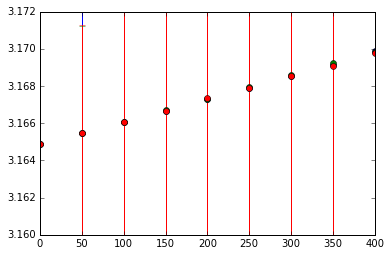

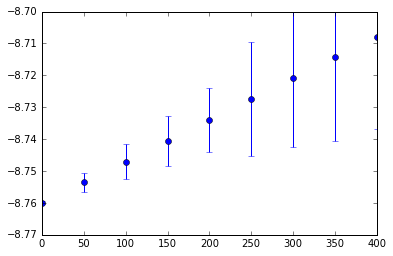

In [6]:
d = data[data.ma==5]
plt.errorbar(d['temperature (K)'], d['a (A)'], fmt='o', yerr=list(d['a err (A)']))
plt.errorbar(d['temperature (K)'], d['b (A)'], fmt='o', yerr=list(d['b err (A)']))
plt.errorbar(d['temperature (K)'], d['c (A)'], fmt='o', yerr=list(d['c err (A)']))
plt.ylim(3.16, 3.172)
plt.show()
plt.errorbar(d['temperature (K)'], d['Ecoh (eV)'], fmt='o', yerr=list(d['Ecoh err (eV)']))
plt.ylim(-8.77, -8.70)
plt.show()

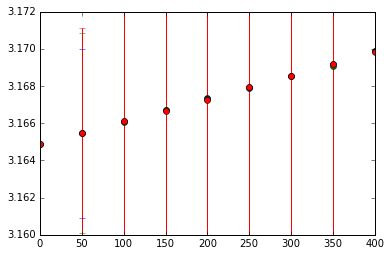

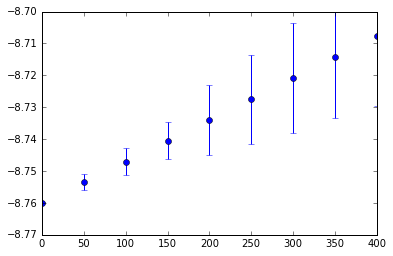

In [7]:
d = data[data.ma==6]
plt.errorbar(d['temperature (K)'], d['a (A)'], fmt='o', yerr=list(d['a err (A)']))
plt.errorbar(d['temperature (K)'], d['b (A)'], fmt='o', yerr=list(d['b err (A)']))
plt.errorbar(d['temperature (K)'], d['c (A)'], fmt='o', yerr=list(d['c err (A)']))
plt.ylim(3.16, 3.172)
plt.show()
plt.errorbar(d['temperature (K)'], d['Ecoh (eV)'], fmt='o', yerr=list(d['Ecoh err (eV)']))
plt.ylim(-8.77, -8.70)
plt.show()

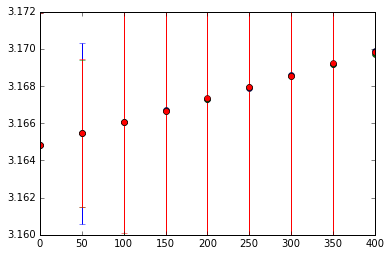

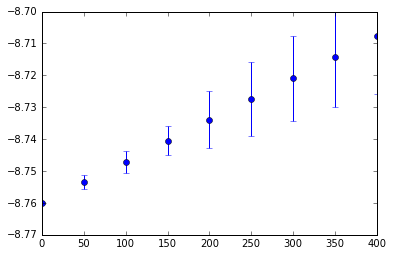

In [8]:
d = data[data.ma==7]
plt.errorbar(d['temperature (K)'], d['a (A)'], fmt='o', yerr=list(d['a err (A)']))
plt.errorbar(d['temperature (K)'], d['b (A)'], fmt='o', yerr=list(d['b err (A)']))
plt.errorbar(d['temperature (K)'], d['c (A)'], fmt='o', yerr=list(d['c err (A)']))
plt.ylim(3.16, 3.172)
plt.show()
plt.errorbar(d['temperature (K)'], d['Ecoh (eV)'], fmt='o', yerr=list(d['Ecoh err (eV)']))
plt.ylim(-8.77, -8.70)
plt.show()

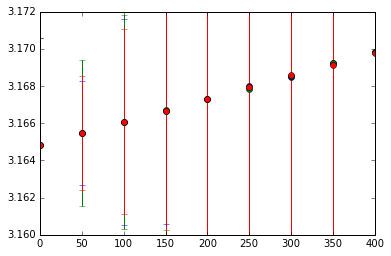

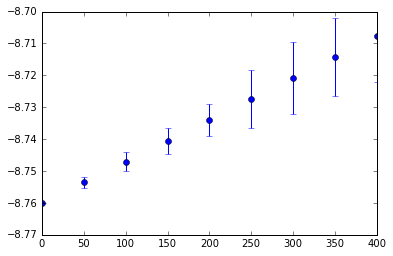

In [9]:
d = data[data.ma==8]
plt.errorbar(d['temperature (K)'], d['a (A)'], fmt='o', yerr=list(d['a err (A)']))
plt.errorbar(d['temperature (K)'], d['b (A)'], fmt='o', yerr=list(d['b err (A)']))
plt.errorbar(d['temperature (K)'], d['c (A)'], fmt='o', yerr=list(d['c err (A)']))
plt.ylim(3.16, 3.172)
plt.show()
plt.errorbar(d['temperature (K)'], d['Ecoh (eV)'], fmt='o', yerr=list(d['Ecoh err (eV)']))
plt.ylim(-8.77, -8.70)
plt.show()

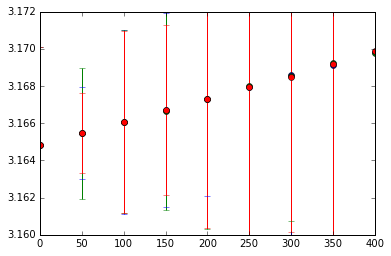

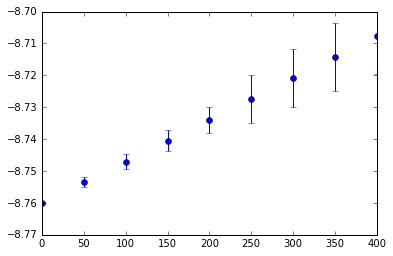

In [10]:
d = data[data.ma==9]
plt.errorbar(d['temperature (K)'], d['a (A)'], fmt='o', yerr=list(d['a err (A)']))
plt.errorbar(d['temperature (K)'], d['b (A)'], fmt='o', yerr=list(d['b err (A)']))
plt.errorbar(d['temperature (K)'], d['c (A)'], fmt='o', yerr=list(d['c err (A)']))
plt.ylim(3.16, 3.172)
plt.show()
plt.errorbar(d['temperature (K)'], d['Ecoh (eV)'], fmt='o', yerr=list(d['Ecoh err (eV)']))
plt.ylim(-8.77, -8.70)
plt.show()

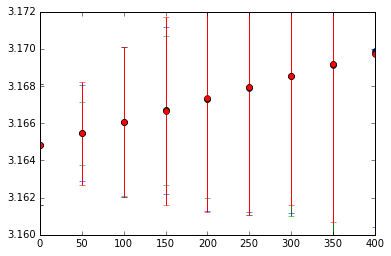

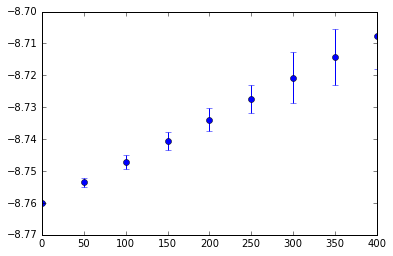

In [11]:
d = data[data.ma==10]
plt.errorbar(d['temperature (K)'], d['a (A)'], fmt='o', yerr=list(d['a err (A)']))
plt.errorbar(d['temperature (K)'], d['b (A)'], fmt='o', yerr=list(d['b err (A)']))
plt.errorbar(d['temperature (K)'], d['c (A)'], fmt='o', yerr=list(d['c err (A)']))
plt.ylim(3.16, 3.172)
plt.show()
plt.errorbar(d['temperature (K)'], d['Ecoh (eV)'], fmt='o', yerr=list(d['Ecoh err (eV)']))
plt.ylim(-8.77, -8.70)
plt.show()

3.16608050123 +- 0.0040416921963
3.16608004367 +- 0.00403596436627
3.16608682993 +- 0.00401458577133


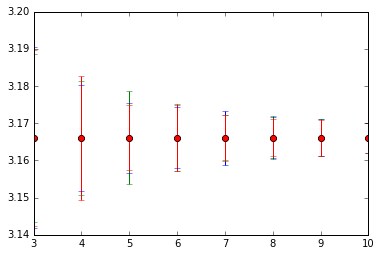

In [14]:
d = data[np.isclose(data['temperature (K)'], 100.0)]
plt.errorbar(d['ma'], d['a (A)'], fmt='o', yerr=list(d['a err (A)']))
plt.errorbar(d['ma'], d['b (A)'], fmt='o', yerr=list(d['b err (A)']))
plt.errorbar(d['ma'], d['c (A)'], fmt='o', yerr=list(d['c err (A)']))
print float(d[d.ma==10]['a (A)']), '+-', float(d[d.ma==10]['a err (A)'])
print float(d[d.ma==10]['b (A)']), '+-', float(d[d.ma==10]['b err (A)'])
print float(d[d.ma==10]['c (A)']), '+-', float(d[d.ma==10]['c err (A)'])

In [8]:
5/2

2.5